# Обучение с учителем в Scikit-learn

# Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [123]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.plot([0, 50], [0, 50], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.plot([0, 50], [0, 50], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

In [125]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [126]:
from sklearn.datasets import load_boston

boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [127]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [128]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [130]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [131]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [132]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
173,23.600,28.649
274,32.400,36.495
491,13.600,15.411
72,22.800,25.403
452,16.100,18.855
76,20.000,23.147
316,17.800,17.392
140,14.000,14.079
471,19.600,23.037
500,16.800,20.599


In [133]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7112260057484955

Train:	R2 = 0.743	MAE = 3
Test:	R2 = 0.711	MAE = 3


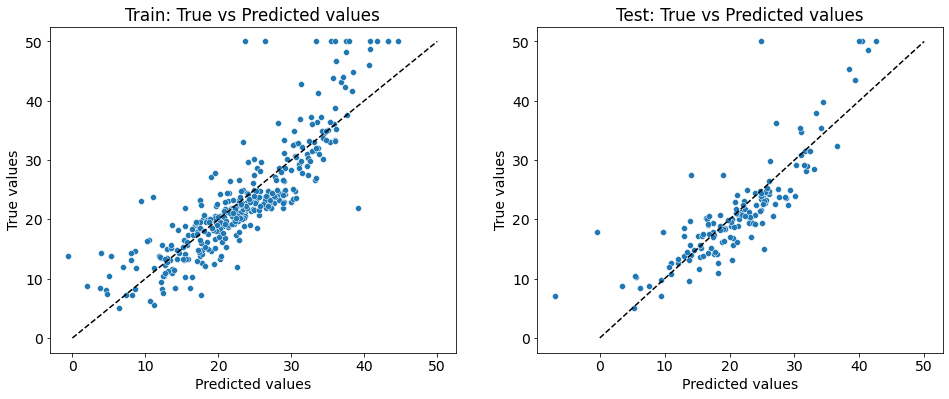

In [134]:
evaluate_preds(y_train["price"], y_train_pred.flatten(),y_test["price"],  y_pred.flatten())


# Задание 2

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators = 1000,max_depth =12,random_state=42)
rf_model.fit(X_train, y_train.values[:, 0])


RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [137]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)


r1 = round(r2_score(y_train.values[:, 0], y_train_preds),3)
r2 = round(r2_score(y_test.values[:, 0], y_test_preds),3)
print (f'Тренировочная выборка r2 = {r1}, тестовая выборка r2 = {r2}')

Тренировочная выборка r2 = 0.978, тестовая выборка r2 = 0.875


Train:	R2 = 0.978	MAE = 0
Test:	R2 = 0.875	MAE = 2


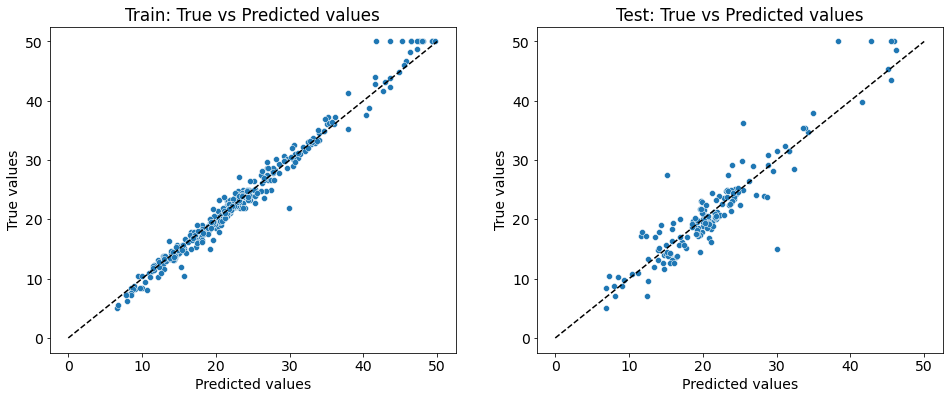

In [138]:
evaluate_preds(y_train.values[:, 0], y_train_preds, y_test.values[:, 0], y_test_preds)

В данном случае модель случайного леса работает лучше, так как ее R2 больше, чем у линейной регрессии.